## Import dependency

In [1]:
import os
import csv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
%matplotlib inline
import seaborn as sns

## Membaca Data di Dalam Folder

In [143]:
inputFolder = []
bigData = []
namaFile = []
series_resistance = 100000
ampFactor = 1000000

for i in range(2):
    num = input('Masukkan Nama Input Folder ke-'+str(i)+' : ')
    inputFolder.append(num)
    
for i in range(2):
    bigData.append(pd.DataFrame())
    namaFile.append((os.listdir('./'+inputFolder[i])))
    for j in range(len(namaFile[i])):
        namaFile[i][j]=namaFile[i][j].replace('.csv','')

for i in range(2):
    for nf in namaFile[i]:
        data = pd.read_csv('./'+inputFolder[i]+'/'+nf+'.csv')
#         if not('time') in bigData[i]:
#             bigData[i] = data[['time']]
        bigData[i]['time'] = data['time']
        bigData[i][nf] = data['Vol.']*ampFactor/series_resistance

Masukkan Nama Input Folder ke-0 : SF 90 V 500
Masukkan Nama Input Folder ke-1 : SF 90 v 1000


In [144]:
bigData[0]
# bigData[0].max()

,time,"11,6 kV","19,6 kV","27,6 kV","35,6 kV","43,6 kV","51,6 kV"
0,0.000000,-0.8,-2.0,1.0,2.0,-4.0,-4.0
1,0.000002,-0.8,1.0,-2.0,2.0,-4.0,-4.0
2,0.000003,-0.8,-2.0,-2.0,2.0,-4.0,-8.0
3,0.000005,-0.8,-2.0,-2.0,2.0,-4.0,-4.0
4,0.000006,-0.8,1.0,-2.0,2.0,-4.0,-4.0
...,...,...,...,...,...,...,...
87495,0.139992,-0.8,-2.0,1.0,2.0,-4.0,-8.0
87496,0.139994,-0.8,-2.0,1.0,2.0,-4.0,-8.0
87497,0.139995,-0.8,-2.0,1.0,2.0,-4.0,-8.0
87498,0.139997,-0.8,-2.0,1.0,2.0,-4.0,-8.0


## Plotting domain waktu (SESUAIKAN NAMA GAMBAR)

Masukkan Nama gambar olahan 500 jam:Waveform Virgin Salt-Fog Rh-90% 500-Hours
Masukkan Nama gambar olahan 1000 jam:Waveform Virgin Salt-Fog Rh-90% 1000-Hours
Masukkan nama folder tempat menyimpan data: Waveform Virgin Salt-Fog Rh-90%


<ipython-input-145-30912117f8b4>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig0.show()
<ipython-input-145-30912117f8b4>:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


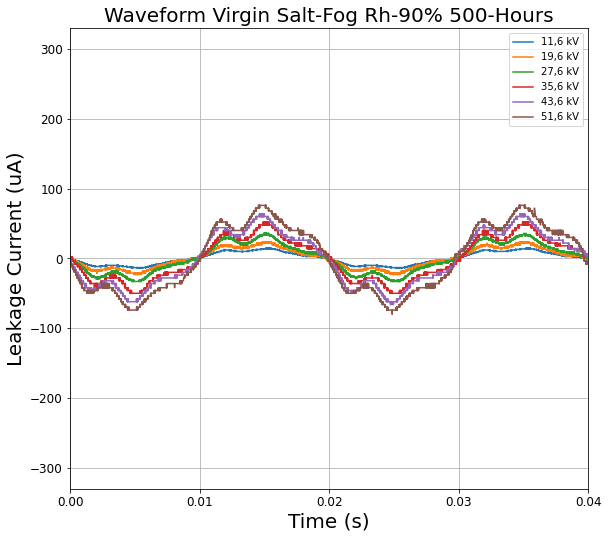

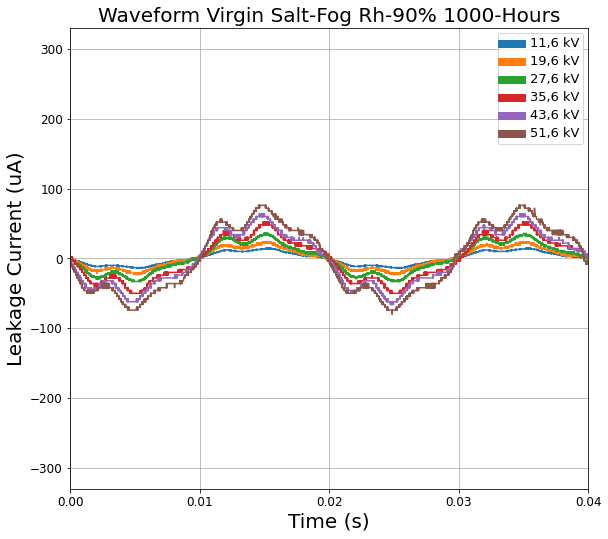

In [145]:
namaGambar0 = input('Masukkan Nama gambar olahan 500 jam:')
namaGambar1 = input('Masukkan Nama gambar olahan 1000 jam:')
outputFolder = input('Masukkan nama folder tempat menyimpan data: ')
os.mkdir(outputFolder)

fig0 = plt.figure(figsize = (9,8))
fig1 = plt.figure(figsize = (9,8))
axes0 = fig0.add_axes([0.15,0.1,0.8,0.8])
axes1 = fig1.add_axes([0.15,0.1,0.8,0.8])
# i = 0

for nf in namaFile[0]:
    axes0.plot(bigData[0]['time'],bigData[0][nf],label=nf)
# axes0.plot(bigData[0]['time'],bigData[0]['Virgin'],label='Virgin',color='black')
# axes0.plot(bigData[0]['time'],bigData[0]['A3'],label='A3',color='green')
# axes0.plot(bigData[0]['time'],bigData[0]['A1'],label='A1',color='blue')
# axes0.plot(bigData[0]['time'],bigData[0]['A2'],label='A2',color='orange')
# axes0.plot(bigData[0]['time'],bigData[0]['PAU'],label='PAU',color='red')

for nf in namaFile[1]:
    axes1.plot(bigData[1]['time'],bigData[1][nf],label=nf)

axes0.legend()
axes0.set_title(namaGambar0, fontsize = 20)
axes0.set_xlabel('Time (s)', fontsize = 20)
axes0.set_ylabel('Leakage Current (uA)', fontsize = 20)
axes0.set_xlim([0,0.04])
axes0.set_ylim([-330,330])
axes0.set_xticks(np.linspace(0,0.04,5))
axes0.grid()
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(15)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(23)
for label in (axes0.get_xticklabels() + axes0.get_yticklabels()):
    label.set_fontsize(12)
fig0.show()

axes1.legend()
axes1.set_title(namaGambar1, fontsize = 20)
axes1.set_xlabel('Time (s)', fontsize = 20)
axes1.set_ylabel('Leakage Current (uA)', fontsize = 20)
axes1.set_xlim([0,0.04])
axes1.set_ylim([-330,330])
axes1.set_xticks(np.linspace(0,0.04,5))
axes1.grid()
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(13)
for label in (axes1.get_xticklabels() + axes1.get_yticklabels()):
    label.set_fontsize(12)
fig1.show()

In [146]:
fig0.savefig(fname='./'+outputFolder+'./'+namaGambar0,quality=100,dpi=200)
fig1.savefig(fname='./'+outputFolder+'./'+namaGambar1,quality=100,dpi=200)

<ipython-input-146-fda964c524e2>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig0.savefig(fname='./'+outputFolder+'./'+namaGambar0,quality=100,dpi=200)
<ipython-input-146-fda964c524e2>:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig1.savefig(fname='./'+outputFolder+'./'+namaGambar1,quality=100,dpi=200)


## Plotting Spektrum Frekuensi (GANTI NAMA FFT)

JANGAN LUPA DI GANTI NAMA GAMBAR FFT

<ipython-input-9-c2f04895953b>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig0.savefig(fname='./'+outputFolder+'/'+nf,quality=100,dpi=150)


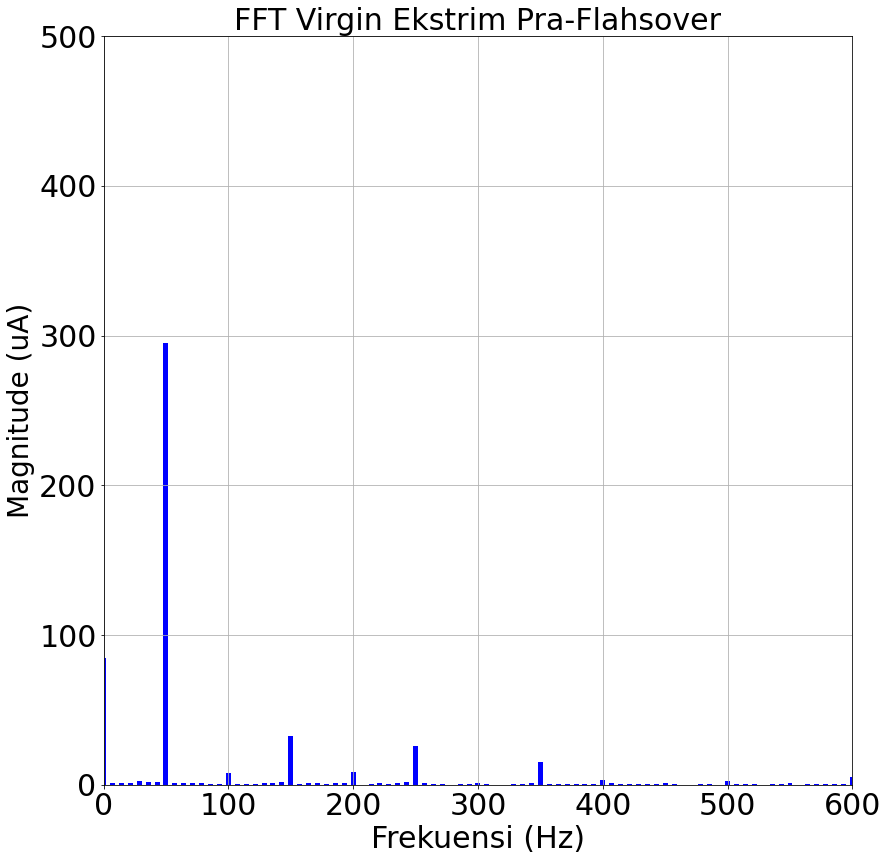

In [9]:
N0 = bigData[0]['time'].shape[0]
T0 = float(bigData[0]['time'].iloc[-1] /N0)
for nf in namaFile[0]:
    yf0 = np.fft.fft(bigData[0][nf])
    xf0 = np.linspace(0.0, 1.0/(2*T0), int(N0/2))
    yf0_mag = 2.0/N0 * np.abs(yf0[:N0//2])
    
    fig0 = plt.figure(figsize=(13,13))
    axes0 = fig0.add_axes([0.1,0.1,0.8,0.8])
    axes0.bar(xf0,yf0_mag,width=4,label=nf,color='blue')
    axes0.set_title('FFT Virgin Ekstrim Pra-Flahsover',fontsize = 30)
    axes0.set_xlabel('Frekuensi (Hz)',fontsize = 30)
    axes0.set_ylabel('Magnitude (uA)',fontsize = 28)
    axes0.set_xlim([0,600])
    axes0.set_ylim([0,500])
    axes0.grid()
    for label in (axes0.get_xticklabels() + axes0.get_yticklabels()):
        label.set_fontsize(30)
    fig0.savefig(fname='./'+outputFolder+'/'+nf,quality=100,dpi=150)


## Menghitung THD dan statistik lainnya

In [10]:
outputData0 = pd.DataFrame()
# outputData1 = pd.DataFrame()
N = bigData[0]['time'].shape[0]
T = float(bigData[0]['time'].iloc[-1] /N)
THD0 = []
yMax0 = []
RMSValue0 = []
# THD1 = []
# yMax1 = []
# RMSValue1 = []

for nf in namaFile[0]:
    yf = np.fft.fft(bigData[0][nf])
    xf = np.linspace(0.0, 1.0/(2*T), int(N/2))
    yf_mag = 2.0/N * np.abs(yf[:N//2])
    harmonic = 0
    harmonic_sum = 0
    for i in range(2,1000):
        harmonic = yf_mag[i*7]
        harmonic_sum = harmonic_sum + harmonic*harmonic
    THD0.append((np.sqrt(harmonic_sum)) / np.abs(yf_mag[7])*100)
    yMax0.append(bigData[0][nf].max())
    RMSValue0.append(np.sqrt(bigData[0][nf].apply(lambda x: x**2).sum()/bigData[0][nf].size))
#     RMSCoba = np.sqrt(np.mean(bigData[0][nf]**2))
#     print(RMSValue0)
#     hey=(RMSCoba**2)
#     hei=(harmonic_sum+(yf_mag[7]**2))/2
#     print(hey)
#     print(hei)


# for nf in namaFile[1]:
#     yf = np.fft.fft(bigData[1][nf])
#     xf = np.linspace(0.0, 1.0/(2*T), int(N/2))
#     yf_mag = 2.0/N * np.abs(yf[:N//2])
#     harmonic = 0
#     harmonic_sum = 0
#     for i in range(2,100):
#         harmonic = yf_mag[i*7]
#         harmonic_sum = harmonic_sum + harmonic*harmonic
#     THD1.append((np.sqrt(harmonic_sum)) / np.abs(yf_mag[7])*100)
    
#     yMax1.append(bigData[1][nf].max())
#     RMSValue1.append(np.sqrt(bigData[1][nf].apply(lambda x: x**2).sum()/bigData[1][nf].size))    

outputData0['Sampel'] = namaFile[0]
outputData0['THD(%)'] = THD0
outputData0['Arus Max(uA)'] = yMax0
outputData0['RMS Value(uA)'] = RMSValue0
# outputData1['Level Tegangan'] = namaFile[1]
# outputData1['THD(%)'] = THD1
# outputData1['Arus Max(uA)'] = yMax1
# outputData1['RMS Value(uA)'] = RMSValue1


# bigData[0] = bigData[0].rename({'time':'time (s)}, axis=1)
# bigData[1] = bigData[1].rename({'time':'time (s)','11,6 kV':'11,6 kV (uA)','19,6 kV':'19,6 kV (uA)','27,6 kV':'27,6 kV (uA)','35,6 kV':'35,6 kV (uA)','43,6 kV':'43,6 kV (uA)','51,6 kV':'51,6 kV (uA)'}, axis=1)

In [11]:
outputData0

,Sampel,THD(%),Arus Max(uA),RMS Value(uA)
0,Virgin,16.994981,1960.0,218.906039


In [12]:
bigData[0]

,time,Virgin
0,0.000000,240.0
1,0.000002,160.0
2,0.000003,160.0
3,0.000005,160.0
4,0.000006,160.0
...,...,...
87495,0.139992,240.0
87496,0.139994,240.0
87497,0.139995,160.0
87498,0.139997,160.0


## Output Ke File Excel

In [13]:
outputData0.to_excel(excel_writer='./'+outputFolder+'/Olahan_Virgin_Ekstrim_Pra_Flashover.xlsx',index=False)
bigData[0].to_excel(excel_writer='./'+outputFolder+'/Gabungan_Virgin_Ekstrim_Pra_Flashover.xlsx',index=False)
# outputData1.to_excel(excel_writer='./'+outputFolder+'/Olahan_Virgin_Salt Fog_Rh_90_1000 Jam.xlsx',index=False)
# bigData[1].to_excel(excel_writer='./'+outputFolder+'/Gabungan_VIrgin_Salt Fog_Rh_90_1000 Jam.xlsx',index=False)

In [12]:
##Teu Kapake

In [520]:
N1 = bigData[1]['time'].shape[0]
T1 = float(bigData[1]['time'].iloc[-1] /N0)
for nf in namaFile[1]:
    yf1 = np.fft.fft(bigData[1][nf])
    xf1 = np.linspace(0.0, 1.0/(2*T1), int(N1/2))
    yf1_mag = 2.0/N1 * np.abs(yf1[:N1//2])
    
    fig1 = plt.figure(figsize=(13,13))
    axes1 = fig1.add_axes([0.1,0.1,0.8,0.8])
    axes1.bar(xf1,yf1_mag,width=4,label=nf,color='red')
    axes1.set_title('FFT (1000 Jam) PAU Salt Fog Rh-90 Vapplied-'+nf,fontsize = 30)
    axes1.set_xlabel('Frekuensi (Hz)',fontsize = 30)
    axes1.set_ylabel('Magnitude (uA)',fontsize = 28)
    axes1.set_xlim([0,600])
    axes1.set_ylim([0,330])
    axes1.grid()
    for label in (axes1.get_xticklabels() + axes1.get_yticklabels()):
        label.set_fontsize(30)
    fig1.savefig(fname='./'+outputFolder+'/'+nf+' 1000 Jam',quality=100,dpi=150)


<ipython-input-520-b168046093d4>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig1.savefig(fname='./'+outputFolder+'/'+nf+' 1000 Jam',quality=100,dpi=150)


Error in callback <function flush_figures at 0x00000199BB63E940> (for post_execute):


KeyboardInterrupt: 

In [ ]:
N0 = bigData[0]['time'].shape[0]
T0 = float(bigData[0]['time'].iloc[-1] /N0)
N1 = bigData[1]['time'].shape[0]
T1 = float(bigData[1]['time'].iloc[-1] /N1)

fast0 = []
fast1 = []
time0 = []

for nf in namaFile[0]:
    yf0 = np.fft.fft(bigData[0][nf])
#     yf1 = np.fft.fft(bigData[1][nf])
    xf0 = np.linspace(0.0, 1.0/(2*T0), int(N0/2))
    
    yf0_mag = 2.0/N0 * np.abs(yf0[:N0//2])
#     yf1_mag = 2.0/N * np.abs(yf1[:N//2])
    fast0.append(yf0_mag)
    time0.append(xf0)
# yesSeries = pd.Series([1800,2000,3000,1000,2000,1500,1700], index=times)
# nodSeries = pd.Series([200,500,700,600,300,50,0], index=times)

# df = pd.DataFrame({"Example one":yesSeries,"Example two":nodSeries})
# ax = df.plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Epic Graph\nAnother Line! Whoa")
# ax.set_xlabel("date")
# ax.set_ylabel("counts")
# ax.xaxis.set_major_formatter(plt.FixedFormatter(times.strftime("%b %d %Y")))
# plt.show()
    

for nf in namaFile[1]:
#     yf0 = np.fft.fft(bigData[0][nf])
    yf1 = np.fft.fft(bigData[1][nf])
    xf1 = np.linspace(0.0, 1.0/(2*T1), int(N1/2))
    
#     yf0_mag = 2.0/N * np.abs(yf0[:N//2])
    yf1_mag = 2.0/N1 * np.abs(yf1[:N1//2])
    fast1.append(yf1_mag)



for nf in namaFile[0]:
#     yf0Series = pd.Series(yf0_mag, index=xf0)
#     yf1Series = pd.Series(yf1_mag, index=xf0)
    
#     yf = pd.DataFrame({"500 Jam":yf0Series,"1000 Jam":yf1Series})
#     fig = plt.figure(figsize=(10,10))
#     axes = fig.add_axes([0.1,0.1,0.8,0.8])
#     axes = yf.plot.bar(rot=0, title="FFT Vapplied-"+nf)
    df = pd.DataFrame(zip(time0*2, ["yf0_mag"]*2+["yf1_mag"]*2, yf0_mag+yf1_mag), columns=["time (s)", "Aging", "Magnitude (uA)"])
    plt.figure(figsize=(10, 6))
    sns.barplot(x="time (s)", hue="Aging", y="Magnitude (uA)", data=df)
#     axes.bar(xf,yf,width=4,label=nf)
#     axes.set_title('FFT Virgin Dry Fog Vapplied-'+nf, fontsize = 30)
#     axes.set_xlabel('Frekuensi (Hz)')
#     axes.set_ylabel('Magnitude (uA)')
#     axes.xaxis.set_major_formatter(plt.FixedFormatter(times.strftime("%b %d %Y")))

#     axes.set_xlim([0,600])
#     axes.grid()
#     for label in (axes.get_xticklabels() + axes.get_yticklabels()):
#         label.set_fontsize(24)
    plt.show()
#     fig.savefig(fname='./'+outputFolder+'/'+nf,quality=100,dpi=150)


In [214]:
for nf in namaFile[1]:
#     data = pd.read_csv('./'+inputFolder[i]+'/'+nf+'.csv')
#         if not('time') in bigData[i]:
#             bigData[i] = data[['time']]
#     bigData[i]['time'] = data['time']
    bigData[1][nf] = bigData[1][nf]*0.6723842196